In [2]:
!pip install matplotlib -U # installing the latest version matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import matplotlib # version check
print(matplotlib.__version__)

3.5.2


In [4]:
# Google drive mount
from google.colab import drive
drive.mount('/content/drive')

from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import keras
import math
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

Mounted at /content/drive


In [5]:
# Parse dates and set date column to index
df = read_csv('drive/MyDrive/Colab Notebooks/Internship/lesson_19/dataset.csv', 
              parse_dates=["Date"], 
              index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


### Описательные статистики для столбцов High, Low, Open, Close.

In [6]:
df[['High','Low','Open','Close']].describe()

,High,Low,Open,Close
count,1825.000000,1825.000000,1825.000000,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284
std,409.680853,404.310068,407.169994,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912


### Построение графических зависимостей изменения котировок акций по каждому из основных показателей (High, Low, Open, Close)

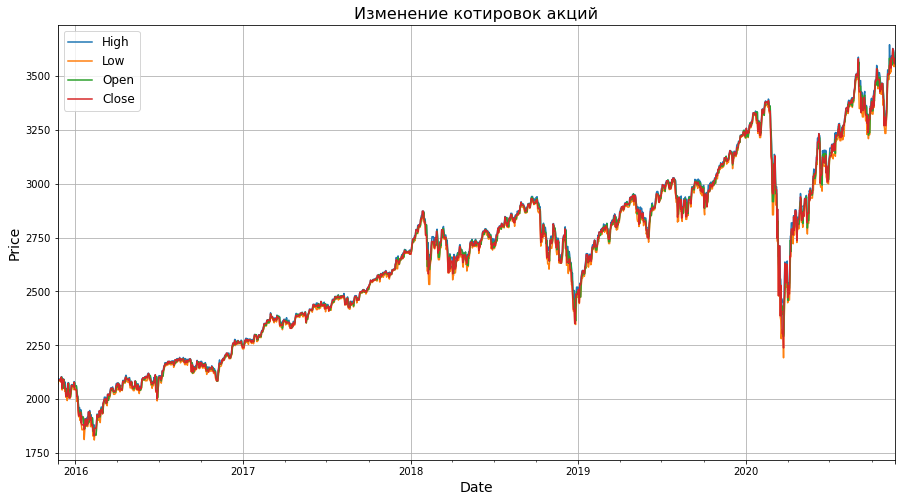

In [7]:
df[['High','Low','Open','Close']].plot(figsize=(15, 8))
plt.title('Изменение котировок акций', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

### Обучение нейронной сети LSTM для прогнозирования временных рядов с помощью TensorFlow и Keras

In [8]:
# Only want closing of trading for each day 
close_price = pd.DataFrame(df['Close'])
close_price.head()

,Close
Date,
2015-11-23,2086.590088
2015-11-24,2089.139893
2015-11-25,2088.870117
2015-11-26,2088.870117
2015-11-27,2090.110107


In [9]:
# Get trading date array
timesteps = close_price.index.to_numpy()
prices = close_price['Close'].to_numpy()

timesteps[:10], prices[:10]

(array(['2015-11-23T00:00:00.000000000', '2015-11-24T00:00:00.000000000',
        '2015-11-25T00:00:00.000000000', '2015-11-26T00:00:00.000000000',
        '2015-11-27T00:00:00.000000000', '2015-11-28T00:00:00.000000000',
        '2015-11-29T00:00:00.000000000', '2015-11-30T00:00:00.000000000',
        '2015-12-01T00:00:00.000000000', '2015-12-02T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([2086.59008789, 2089.13989258, 2088.87011719, 2088.87011719,
        2090.11010742, 2090.11010742, 2090.11010742, 2080.40991211,
        2102.62988281, 2079.51000977]))

In [10]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1460, 365, 1460, 365)

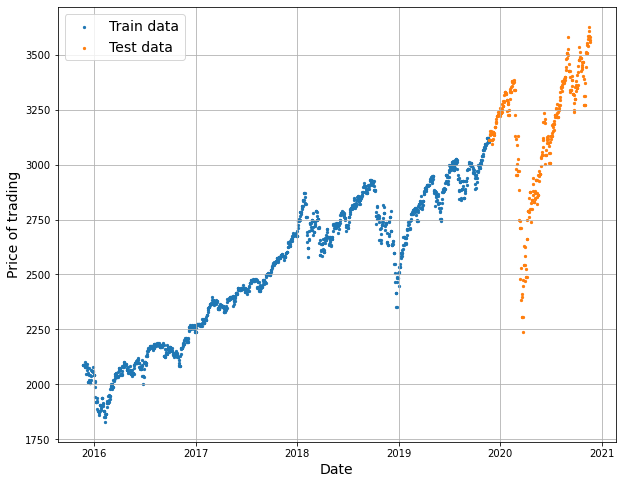

In [11]:
# Plot made splits
plt.figure(figsize=(10, 8))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price of trading", fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [12]:
print(X_train)

['2015-11-23T00:00:00.000000000' '2015-11-24T00:00:00.000000000'
 '2015-11-25T00:00:00.000000000' ... '2019-11-19T00:00:00.000000000'
 '2019-11-20T00:00:00.000000000' '2019-11-21T00:00:00.000000000']


In [13]:
print(y_train)

[2086.59008789 2089.13989258 2088.87011719 ... 3120.17993164 3108.45996094
 3103.54003906]


In [14]:
# Load the dataset
dataset = close_price.values
print(dataset)
print(dataset.shape)

[[2086.59008789]
 [2089.13989258]
 [2088.87011719]
 ...
 [3567.79003906]
 [3581.87011719]
 [3557.54003906]]
(1825, 1)


In [15]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset)
print(dataset.shape)

[[0.14323386]
 [0.14465213]
 [0.14450208]
 ...
 [0.96711598]
 [0.97494769]
 [0.96141466]]
(1825, 1)


In [16]:
# Split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [17]:
print(train)
print(train.shape)

[[0.14323386]
 [0.14465213]
 [0.14450208]
 ...
 [0.71814354]
 [0.71162459]
 [0.708888  ]]
(1460, 1)


In [18]:
print(test[:10])
print(test.shape)

[[0.71264253]
 [0.71264253]
 [0.71264253]
 [0.72563033]
 [0.72945723]
 [0.73674928]
 [0.73674928]
 [0.72971307]
 [0.72971307]
 [0.72971307]]
(365, 1)


In [19]:
# Function for dataset creating
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        #takes 
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
# Reshape into X=t and Y=t+1
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [21]:
print(trainX)
print(trainX.shape)

[[0.14323386 0.14465213 0.14450208 ... 0.14519179 0.14519179 0.14519179]
 [0.14465213 0.14450208 0.14450208 ... 0.14519179 0.14519179 0.13979629]
 [0.14450208 0.14450208 0.14519179 ... 0.14519179 0.13979629 0.15215562]
 ...
 [0.69969357 0.70238018 0.70360385 ... 0.7182993  0.7182993  0.7182993 ]
 [0.70238018 0.70360385 0.70504439 ... 0.7182993  0.7182993  0.71917262]
 [0.70360385 0.70504439 0.7182993  ... 0.7182993  0.71917262 0.71814354]]
(1452, 7)


In [22]:
print(trainY)
print(trainY.shape)

[0.13979629 0.15215562 0.13929574 ... 0.71917262 0.71814354 0.71162459]
(1452,)


In [23]:
print(testX)
print(testX.shape)

[[0.71264253 0.71264253 0.71264253 ... 0.72945723 0.73674928 0.73674928]
 [0.71264253 0.71264253 0.72563033 ... 0.73674928 0.73674928 0.72971307]
 [0.71264253 0.72563033 0.72945723 ... 0.73674928 0.72971307 0.72971307]
 ...
 [0.95473438 0.96982473 0.94999533 ... 0.97677199 0.97677199 1.        ]
 [0.96982473 0.94999533 0.97677199 ... 0.97677199 1.         0.99033286]
 [0.94999533 0.97677199 0.97677199 ... 1.         0.99033286 0.96711598]]
(357, 7)


In [24]:
print(testY[:10])
print(testY.shape)

[0.72971307 0.72971307 0.72971307 0.71463386 0.70313657 0.71401639
 0.71661392 0.73245523 0.73245523 0.73245523]
(357,)


In [25]:
# Reshape input to be [samples, time steps, features].
trainX = np.reshape(trainX, (trainX.shape[0], 1,
                             trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1,
                           testX.shape[1]))

In [26]:
print(trainX)

[[[0.14323386 0.14465213 0.14450208 ... 0.14519179 0.14519179 0.14519179]]

 [[0.14465213 0.14450208 0.14450208 ... 0.14519179 0.14519179 0.13979629]]

 [[0.14450208 0.14450208 0.14519179 ... 0.14519179 0.13979629 0.15215562]]

 ...

 [[0.69969357 0.70238018 0.70360385 ... 0.7182993  0.7182993  0.7182993 ]]

 [[0.70238018 0.70360385 0.70504439 ... 0.7182993  0.7182993  0.71917262]]

 [[0.70360385 0.70504439 0.7182993  ... 0.7182993  0.71917262 0.71814354]]]


In [27]:
print(testX)

[[[0.71264253 0.71264253 0.71264253 ... 0.72945723 0.73674928 0.73674928]]

 [[0.71264253 0.71264253 0.72563033 ... 0.73674928 0.73674928 0.72971307]]

 [[0.71264253 0.72563033 0.72945723 ... 0.73674928 0.72971307 0.72971307]]

 ...

 [[0.95473438 0.96982473 0.94999533 ... 0.97677199 0.97677199 1.        ]]

 [[0.96982473 0.94999533 0.97677199 ... 0.97677199 1.         0.99033286]]

 [[0.94999533 0.97677199 0.97677199 ... 1.         0.99033286 0.96711598]]]


In [28]:
# Reshape input to be [samples, time steps, features].
trainY = np.reshape(trainY, (trainY.shape[0], 1))
testY = np.reshape(testY, (testY.shape[0], 1))

In [29]:
print(trainY)

[[0.13979629]
 [0.15215562]
 [0.13929574]
 ...
 [0.71917262]
 [0.71814354]
 [0.71162459]]


In [30]:
print(testY[:7])

[[0.72971307]
 [0.72971307]
 [0.72971307]
 [0.71463386]
 [0.70313657]
 [0.71401639]
 [0.71661392]]


In [31]:
model = Sequential()

model.add(LSTM(512, return_sequences=True,input_shape=(1, look_back)))
model.add(LSTM(256))
model.add(Dense(1))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 512)            1064960   
                                                                 
 lstm_1 (LSTM)               (None, 256)               787456    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1,852,673
Trainable params: 1,852,673
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY,
                    epochs=10, verbose=2,
                    shuffle=False, batch_size=25)

Epoch 1/10
59/59 - 10s - loss: 0.0022 - 10s/epoch - 168ms/step
Epoch 2/10
59/59 - 2s - loss: 0.0024 - 2s/epoch - 41ms/step
Epoch 3/10
59/59 - 3s - loss: 7.6278e-04 - 3s/epoch - 47ms/step
Epoch 4/10
59/59 - 3s - loss: 3.4294e-04 - 3s/epoch - 48ms/step
Epoch 5/10
59/59 - 3s - loss: 3.3625e-04 - 3s/epoch - 51ms/step
Epoch 6/10
59/59 - 3s - loss: 3.4130e-04 - 3s/epoch - 53ms/step
Epoch 7/10
59/59 - 3s - loss: 3.8390e-04 - 3s/epoch - 48ms/step
Epoch 8/10
59/59 - 3s - loss: 3.4363e-04 - 3s/epoch - 51ms/step
Epoch 9/10
59/59 - 3s - loss: 3.7965e-04 - 3s/epoch - 51ms/step
Epoch 10/10
59/59 - 3s - loss: 3.4688e-04 - 3s/epoch - 48ms/step


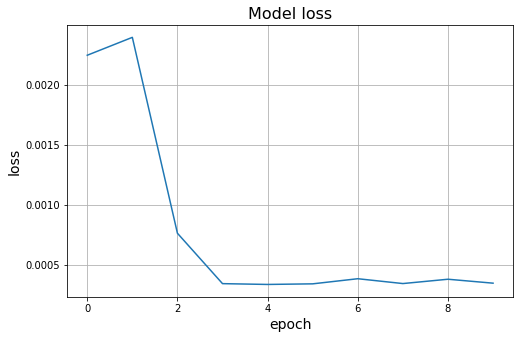

In [33]:
# summarize history for loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.title('Model loss', fontsize=16)
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.grid()
plt.show()

In [34]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
print(trainPredict[:7])
print(testPredict[:7])

[[0.16741529]
 [0.16638394]
 [0.16822168]
 [0.16684198]
 [0.16191532]
 [0.16273281]
 [0.16339916]]
[[0.7517082 ]
 [0.7530999 ]
 [0.75432336]
 [0.7552933 ]
 [0.7524713 ]
 [0.7475434 ]
 [0.7448308 ]]


In [35]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
print(trainPredict)

[[2130.0642]
 [2128.21  ]
 [2131.514 ]
 ...
 [3156.003 ]
 [3159.912 ]
 [3162.508 ]]


In [36]:
trainY = scaler.inverse_transform(trainY)
print(trainY)

[[2080.40991211]
 [2102.62988281]
 [2079.51000977]
 ...
 [3122.0300293 ]
 [3120.17993164]
 [3108.45996094]]


In [37]:
testPredict = scaler.inverse_transform(testPredict)
print(testPredict[:7])

[[3180.5234]
 [3183.0254]
 [3185.225 ]
 [3186.969 ]
 [3181.8953]
 [3173.036 ]
 [3168.1592]]


In [38]:
testY = scaler.inverse_transform(testY)
print(testY[:7])

[[3140.97998047]
 [3140.97998047]
 [3140.97998047]
 [3113.87011719]
 [3093.19995117]
 [3112.76000977]
 [3117.42993164]]


### Оценка качества работы обученной модели с помощью вычисления среднеквадратического отклонения (RMSE) на тренировочной и тестовой частях выборки

In [39]:
# calculate root mean squared error
trainScore_7 = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore_7))
testScore_7 = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore_7))

Train Score: 62.94 RMSE
Test Score: 79.60 RMSE


### Графическое отображение результатов работы модели, реального изменения котировок и предсказанного с помощью модели

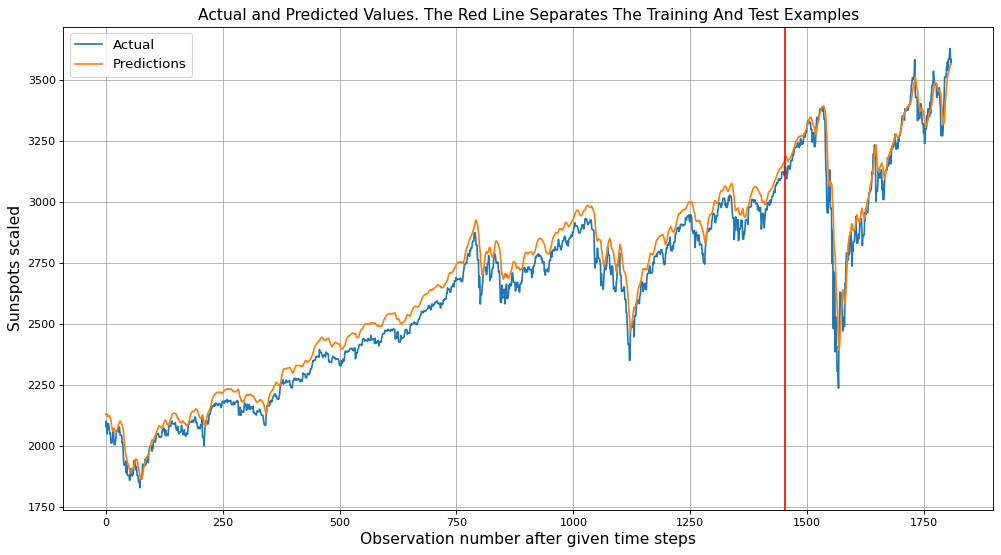

In [40]:
# Plot the result
actual = np.append(trainY, testY)
predictions = np.append(trainPredict, testPredict)
rows = len(actual)
plt.figure(figsize=(15, 8), dpi=80)
plt.plot(range(rows), actual)
plt.plot(range(rows), predictions)
plt.axvline(x=len(trainY), color='r')
plt.legend(['Actual', 'Predictions'], fontsize=12)
plt.xlabel('Observation number after given time steps', fontsize=14)
plt.ylabel('Sunspots scaled', fontsize=14)
plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples', fontsize=14)
plt.grid()
plt.show()

### Эксперименты для улучшения модели, с изменением размера окна: 4, 5, 6, 7, 8, 9, 10. Горизонт (количество предсказываемых за одно обращение значений) остается без изменения (равным 1)

In [41]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 8), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'], fontsize=12)
    plt.xlabel('Observation number after given time steps', fontsize=14)
    plt.ylabel('Sunspots scaled', fontsize=14)
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples (window size = %i)' % (look_back), fontsize=14)
    plt.grid()
    plt.show()

In [42]:
window_sizes = [4, 5, 6, 7, 8, 9, 10]

In [43]:
# lists of trainScore and testScore values for different windows sizes
trainScore_list = []
testScore_list = []

Window size = 4:
Train Score: 45.66 RMSE
Test Score: 65.80 RMSE


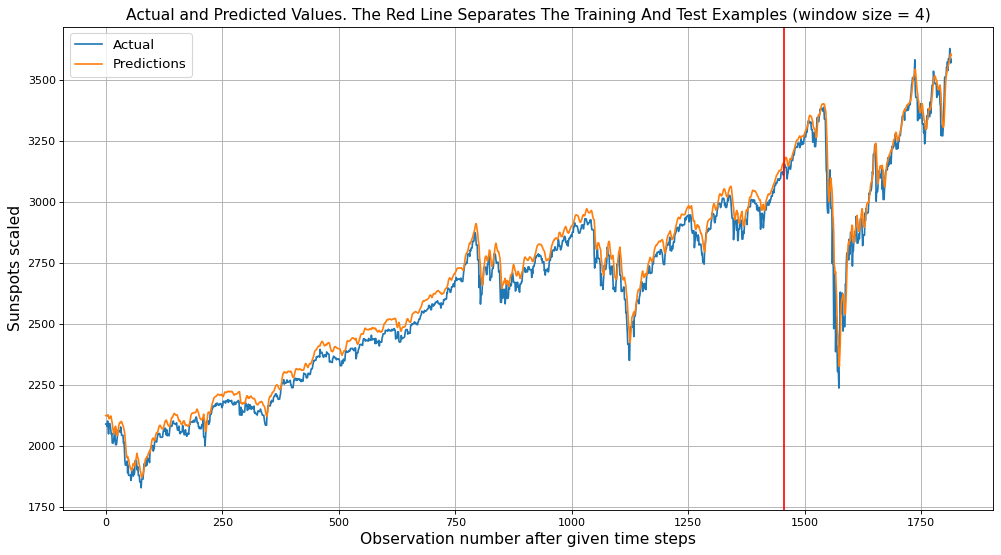

Window size = 5:
Train Score: 41.11 RMSE
Test Score: 67.34 RMSE


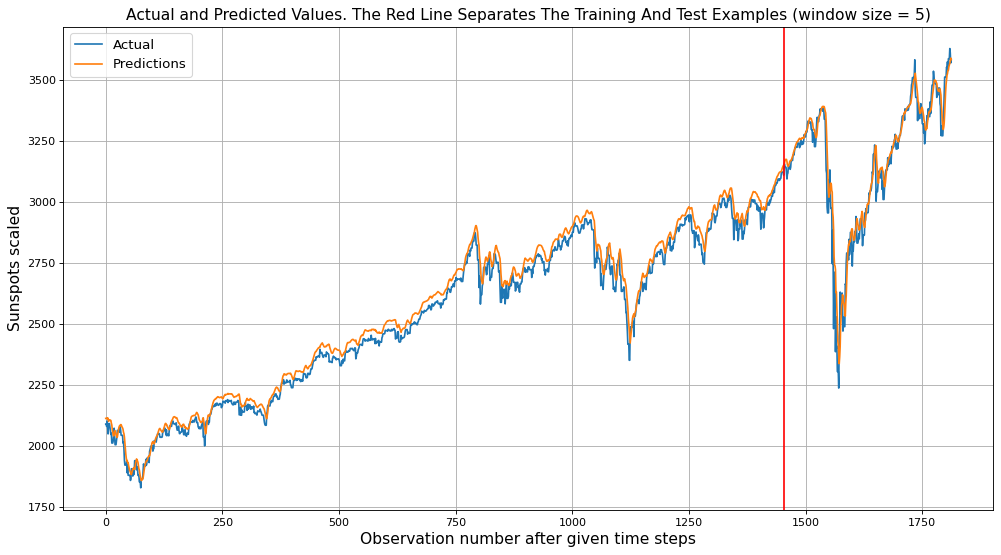

Window size = 6:
Train Score: 46.97 RMSE
Test Score: 72.64 RMSE


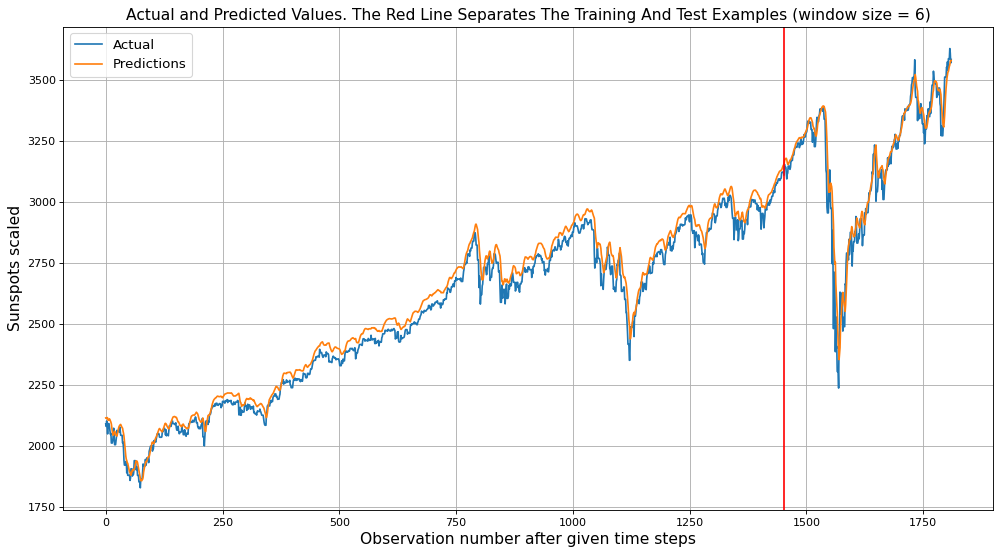

Window size = 7:
Train Score: 63.51 RMSE
Test Score: 78.13 RMSE


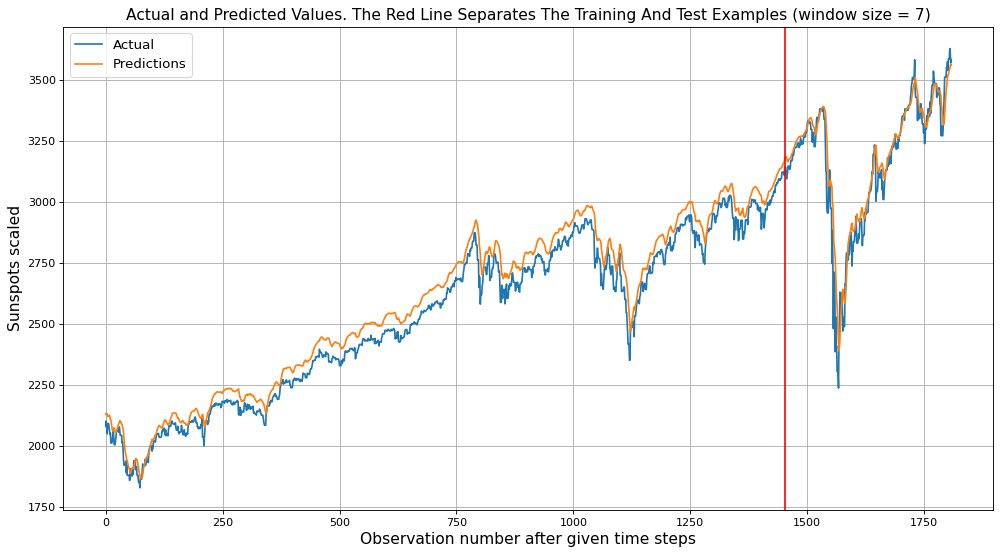

Window size = 8:
Train Score: 64.33 RMSE
Test Score: 81.16 RMSE


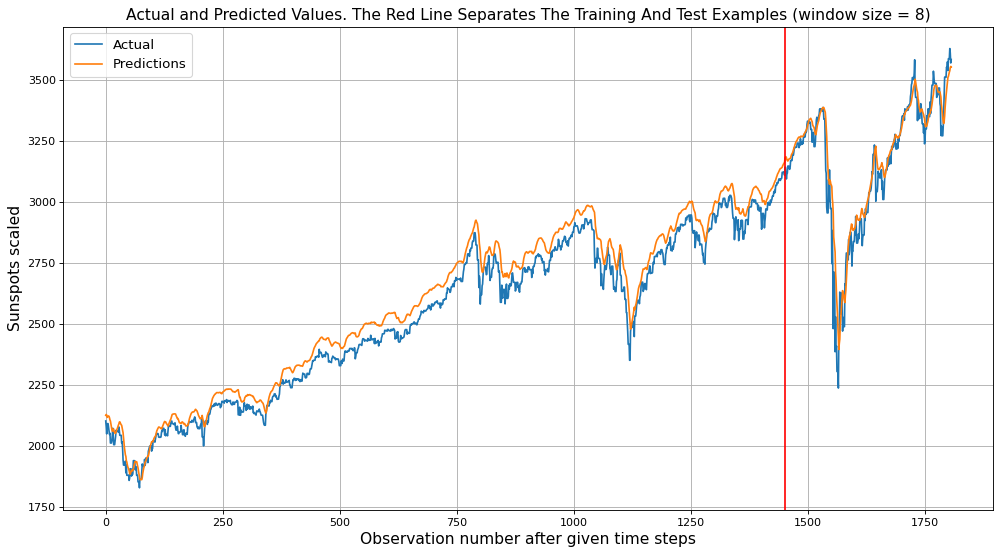

Window size = 9:
Train Score: 38.07 RMSE
Test Score: 75.66 RMSE


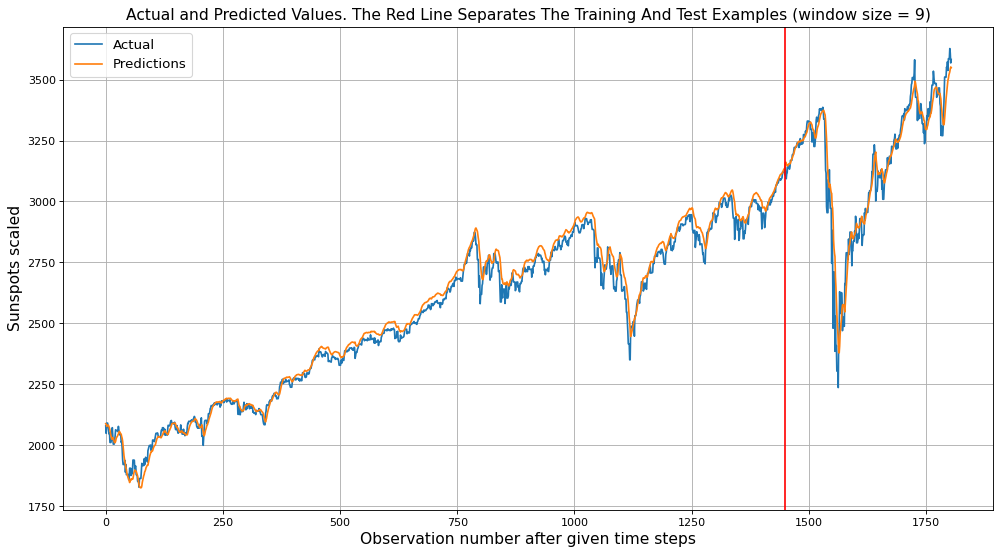

Window size = 10:
Train Score: 38.82 RMSE
Test Score: 78.89 RMSE


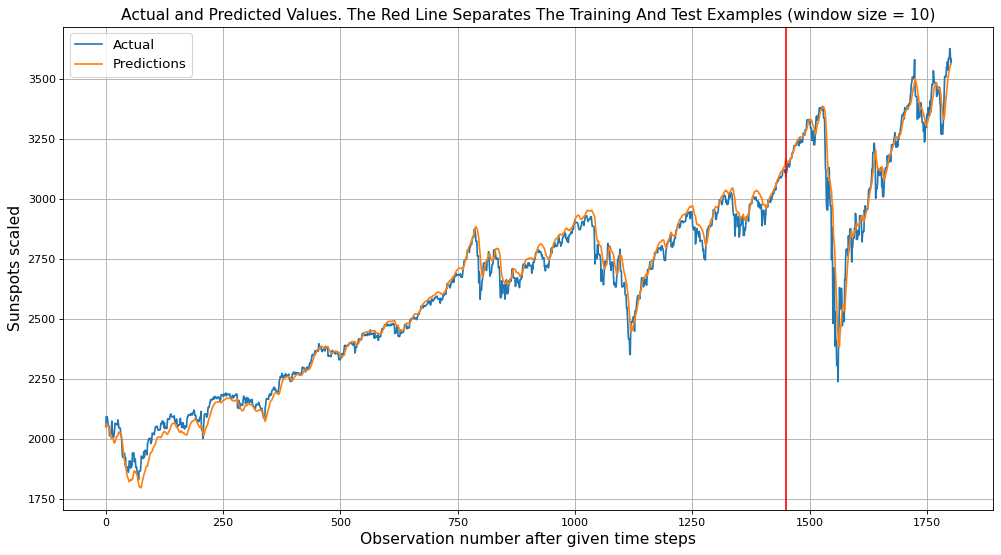

In [44]:
for look_back in window_sizes:  
    # Reshape into X=t and Y=t+1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    # Reshape input to be [samples, time steps, features].
    trainX = np.reshape(trainX, (trainX.shape[0], 1,
                                trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1,
                              testX.shape[1]))

    # Reshape input to be [samples, time steps, features].
    trainY = np.reshape(trainY, (trainY.shape[0], 1))
    testY = np.reshape(testY, (testY.shape[0], 1))

    model = Sequential()
    model.add(LSTM(512, return_sequences=True,input_shape=(1, look_back)))
    model.add(LSTM(256))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    history = model.fit(trainX, trainY,
                        epochs=10, verbose=0,
                        shuffle=False, batch_size=25)

    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)

    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(trainY)
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(testY)

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
    trainScore_list.append(trainScore)
    print('Window size = %i:' % (look_back))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
    testScore_list.append(testScore)
    print('Test Score: %.2f RMSE' % (testScore))

    #Plot result
    plot_result(trainY, testY, trainPredict, testPredict)

### Сравнение качества работы всех моделей по показателю RMSE для тренировочной и для тестовой выборок. Построение соответствующей столбчатой диаграммы

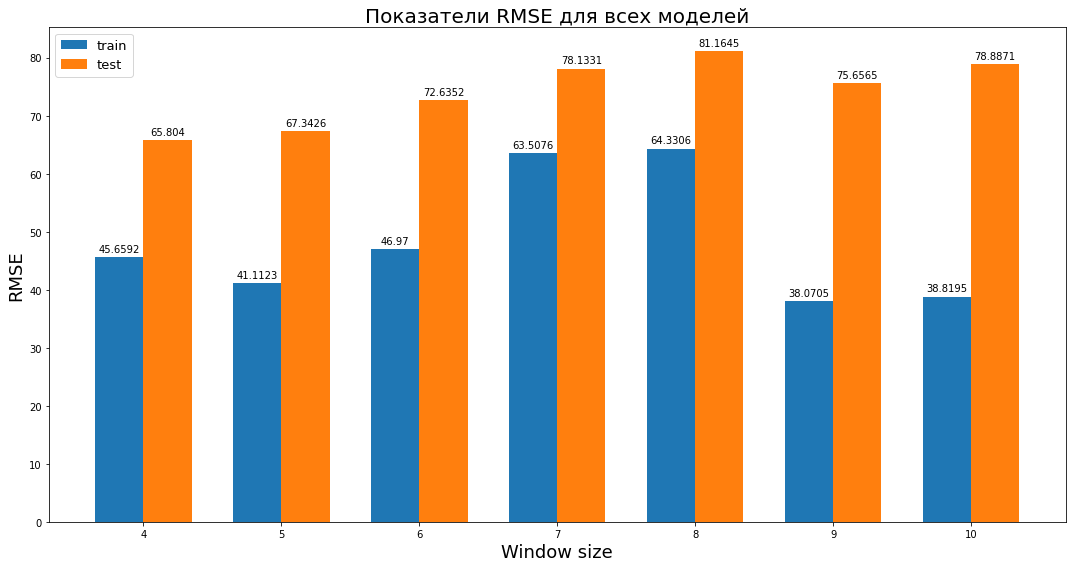

In [45]:
labels = range(4, 11) # windows size from 4 to 10
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width/2, trainScore_list, width, label='train')
rects2 = ax.bar(x + width/2, testScore_list, width, label='test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Window size', fontsize=18) 
ax.set_ylabel('RMSE', fontsize=18)
ax.set_title('Показатели RMSE для всех моделей', fontsize=20)
ax.set_xticks(x, labels)
ax.legend(loc='upper left', fontsize=13)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()